# Need to make it work for color -- change entire code 

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

#### Low pass filter -- removes edges
#### High pass filter -- complement of low pass filter(retains only the edges)

In [2]:
image1 = Image.open('Data/Data for Hybrid Images/cat.bmp')# low pass filter
image2 = Image.open('Data/Data for Hybrid Images/dog.bmp')# high pass filter

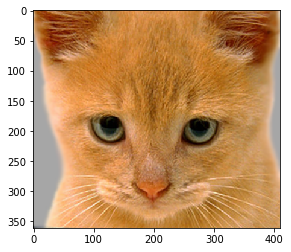

In [3]:
plt.imshow(image1,cmap='gray')
image1 = np.asarray(image1)

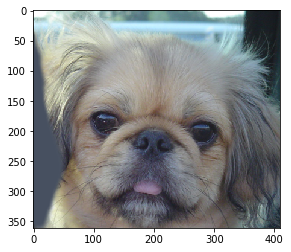

In [4]:
plt.imshow(image2,cmap='gray')
image2 = np.asarray(image2)

In [5]:
image2 = np.asarray(image2)
print(image2.shape)

(361, 410, 3)


In [6]:
def my_conv2(image, filters):
    # perform cross_correlation between image and filter
    # padding
    output = np.zeros(shape=((image.shape[0]-(filters.shape[0])+1),(image.shape[1]-(filters.shape[1])+1)))
    #output = np.zeros(shape=(image.shape[0],image.shape[1]))
    filters = np.flip(np.flip(filters,axis=0),axis=1)
    print("Output shape is ",output.shape)
    k1= (int)((filters.shape[0]-1)/2)
    rem1= filters.shape[0]-(2*k1)
    k2= int((filters.shape[1]-1)/2)
    rem2= filters.shape[1]-(2*k2)
    for i in range(k1,image.shape[0]-k1-1):
        for j in range(k2,image.shape[1]-k2-1):
            image_area= image[i-k1:i+k1+rem1,j-k2:j+k2+rem2]
            temp = np.multiply(image_area,filters)
            temp_sum = np.sum(temp)
            output[i-k1,j-k2]=temp_sum
    return output

In [7]:
def gaussian_blur_kernel_2d(sigma, width, height):
    offset_x, offset_y = (width - 1) / 2, (height - 1) / 2
    x = np.arange(-offset_x, offset_x + 1, 1.0) ** 2
    y = np.arange(-offset_y, offset_y + 1, 1.0) ** 2
    coefficient = 1 / (2 * sigma * sigma * np.pi)
    gaussian_x = np.sqrt(coefficient) * np.exp(-x / (2 * sigma * sigma)) # taking mean as 0
    gaussian_y = np.sqrt(coefficient) * np.exp(-y / (2 * sigma * sigma)) 
    kernel = np.outer(gaussian_x, gaussian_y) / (np.sum(gaussian_x) * np.sum(gaussian_y))
    return kernel

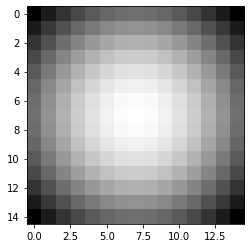

In [8]:
kernel= gaussian_blur_kernel_2d(10,15,15)
plt.imshow(kernel,cmap='gray')

In [9]:
def conv3d(image, filters):
    output=[]
    output = np.asarray(output)
    output = my_conv2(image[:,:,0],filters)
    for i in range(1,3):
        output = np.dstack((output, my_conv2(image[:,:,i],filters)))
    return output

Output shape is  (347, 396)
Output shape is  (347, 396)
Output shape is  (347, 396)


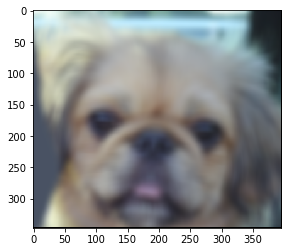

In [10]:
test = conv3d(image2,kernel)
test = (test- test.min())/ (test.max()-test.min())
plt.imshow(test)

Output shape is  (347, 396)
Output shape is  (347, 396)
Output shape is  (347, 396)


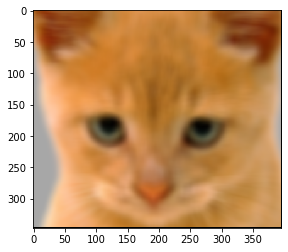

In [11]:
import PIL
test1 = conv3d(image1, kernel)
test1 = (test1- test1.min())/(test1.max()-test1.min())
plt.imshow(test1)


(347, 396, 3)


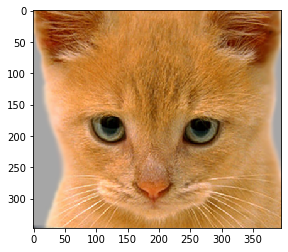

In [12]:
image1 = Image.open('Data/Data for Hybrid Images/cat.bmp')# low pass filter
print(test1.shape)
image1 = image1.resize((test1.shape[1],test1.shape[0]), PIL.Image.ANTIALIAS)
plt.imshow(image1)


In [13]:
image1 = np.asarray(image1)
print(image1.shape)
image1 = (image1- image1.min())/(image1.max()-image1.min())
test2 = image1- test1

(347, 396, 3)


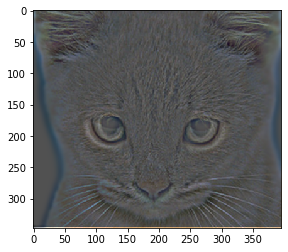

In [14]:
test2 = (test2- test2.min())/(test2.max()-test2.min())
plt.imshow(test2)

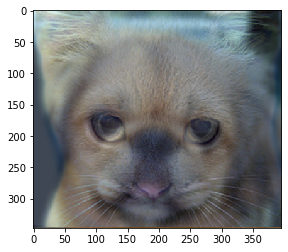

In [15]:
result = test+ test2
result = (result- result.min())/(result.max()-result.min())
plt.imshow(result)

In [16]:
def plotVariousSizes(result,w=2,h=2,dpi=50):
    width=w
    height = h
    dots_per_inch = dpi
    plt.figure(
       figsize=(width,height),
       dpi=dots_per_inch)
    plt.imshow(result)
    plt.tight_layout()


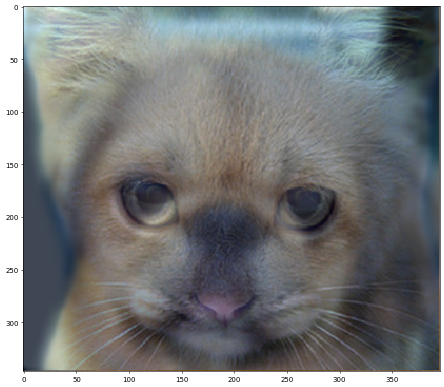

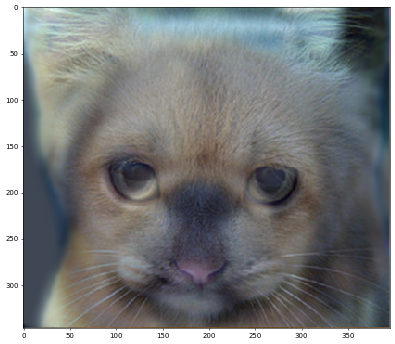

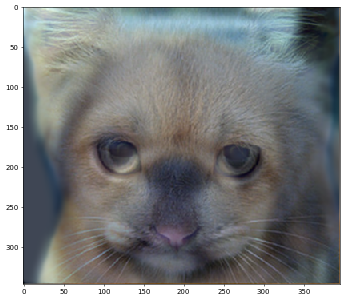

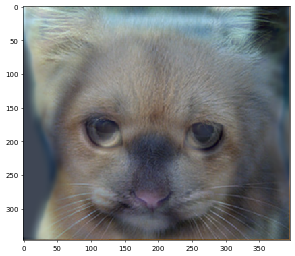

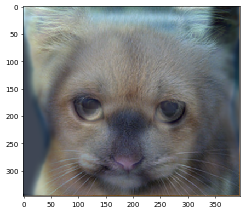

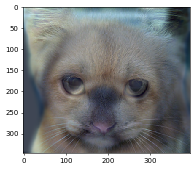

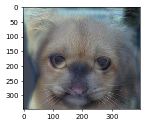

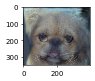

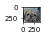

In [19]:
for i in range(9,0,-1):
    plotVariousSizes(result,i,i)